In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Project.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
df.shape

(11162, 17)

## Exploratory Data Analysis:

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
df['contact'].value_counts()

contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

In [10]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [24]:
df['contact'] = df['contact'].fillna(df['contact'].mode()[0])

In [27]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [28]:
df.replace('unknown', 'Not Available', inplace=True)

In [29]:
unknown_after_replacement = (df == 'Not Available').sum()

In [30]:
print(unknown_after_replacement)

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64


In [22]:
df['contact'].value_counts()

contact
cellular         8042
Not Available    2346
telephone         774
Name: count, dtype: int64

In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,Not Available,5,may,1042,1,-1,0,Not Available,yes
1,56,admin.,married,secondary,no,45,no,no,Not Available,5,may,1467,1,-1,0,Not Available,yes
2,41,technician,married,secondary,no,1270,yes,no,Not Available,5,may,1389,1,-1,0,Not Available,yes
3,55,services,married,secondary,no,2476,yes,no,Not Available,5,may,579,1,-1,0,Not Available,yes
4,54,admin.,married,tertiary,no,184,no,no,Not Available,5,may,673,2,-1,0,Not Available,yes


In [32]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [33]:
#Import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

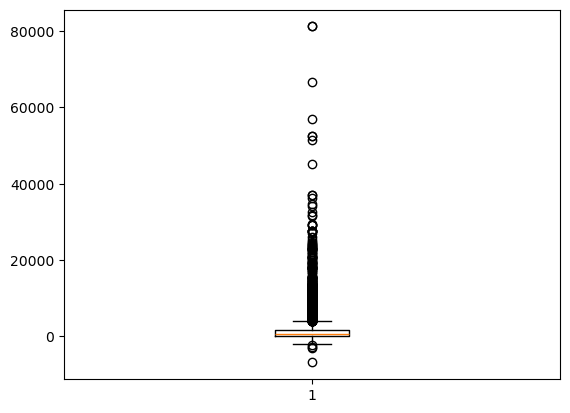

In [34]:
plt.boxplot(df.balance)
plt.show()

In [38]:
df[(df.balance > 200)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,Not Available,5,may,1042,1,-1,0,Not Available,yes
2,41,technician,married,secondary,no,1270,yes,no,Not Available,5,may,1389,1,-1,0,Not Available,yes
3,55,services,married,secondary,no,2476,yes,no,Not Available,5,may,579,1,-1,0,Not Available,yes
6,56,management,married,tertiary,no,830,yes,yes,Not Available,6,may,1201,1,-1,0,Not Available,yes
7,60,retired,divorced,secondary,no,545,yes,no,Not Available,6,may,1030,1,-1,0,Not Available,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11150,34,management,married,secondary,no,355,no,no,cellular,21,aug,314,3,-1,0,Not Available,no
11151,40,management,married,tertiary,no,917,yes,no,Not Available,20,may,292,1,-1,0,Not Available,no
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,jul,659,3,-1,0,Not Available,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,Not Available,no


In [39]:
df[(df.balance < 200)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1,56,admin.,married,secondary,no,45,no,no,Not Available,5,may,1467,1,-1,0,Not Available,yes
4,54,admin.,married,tertiary,no,184,no,no,Not Available,5,may,673,2,-1,0,Not Available,yes
5,42,management,single,tertiary,no,0,yes,yes,Not Available,5,may,562,2,-1,0,Not Available,yes
8,37,technician,married,secondary,no,1,yes,no,Not Available,6,may,608,1,-1,0,Not Available,yes
10,38,admin.,single,secondary,no,100,yes,no,Not Available,7,may,786,1,-1,0,Not Available,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,Not Available,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,Not Available,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,Not Available,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [40]:
df.balance.describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

<Axes: >

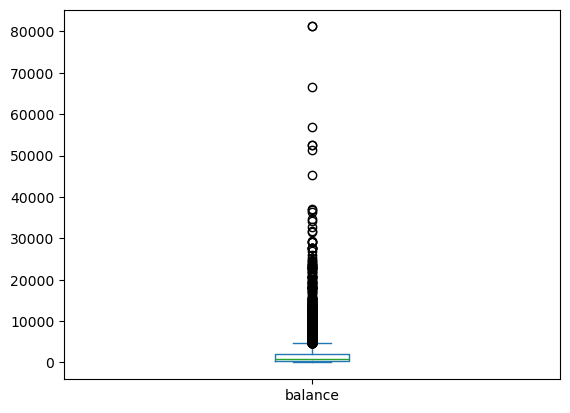

In [41]:
df[df.balance > 0].balance.plot.box()

In [42]:
df[(df.balance < 30)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5,42,management,single,tertiary,no,0,yes,yes,Not Available,5,may,562,2,-1,0,Not Available,yes
8,37,technician,married,secondary,no,1,yes,no,Not Available,6,may,608,1,-1,0,Not Available,yes
17,49,services,married,secondary,no,-8,yes,no,Not Available,8,may,1119,1,-1,0,Not Available,yes
23,43,blue-collar,married,primary,no,-192,yes,no,Not Available,8,may,1120,2,-1,0,Not Available,yes
26,31,technician,single,tertiary,no,22,yes,no,Not Available,9,may,483,3,-1,0,Not Available,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,Not Available,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,Not Available,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,Not Available,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [43]:
df[(df.balance > 30)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,Not Available,5,may,1042,1,-1,0,Not Available,yes
1,56,admin.,married,secondary,no,45,no,no,Not Available,5,may,1467,1,-1,0,Not Available,yes
2,41,technician,married,secondary,no,1270,yes,no,Not Available,5,may,1389,1,-1,0,Not Available,yes
3,55,services,married,secondary,no,2476,yes,no,Not Available,5,may,579,1,-1,0,Not Available,yes
4,54,admin.,married,tertiary,no,184,no,no,Not Available,5,may,673,2,-1,0,Not Available,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11152,34,housemaid,married,secondary,no,390,yes,no,cellular,15,jul,659,3,-1,0,Not Available,no
11153,43,admin.,single,secondary,no,35,no,no,telephone,9,nov,208,1,-1,0,Not Available,no
11154,52,technician,married,tertiary,no,523,yes,yes,cellular,8,jul,113,1,-1,0,Not Available,no
11155,35,blue-collar,married,secondary,no,80,yes,yes,cellular,21,nov,38,2,172,2,failure,no


In [44]:
df[(df.balance <= 30)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
5,42,management,single,tertiary,no,0,yes,yes,Not Available,5,may,562,2,-1,0,Not Available,yes
8,37,technician,married,secondary,no,1,yes,no,Not Available,6,may,608,1,-1,0,Not Available,yes
17,49,services,married,secondary,no,-8,yes,no,Not Available,8,may,1119,1,-1,0,Not Available,yes
23,43,blue-collar,married,primary,no,-192,yes,no,Not Available,8,may,1120,2,-1,0,Not Available,yes
26,31,technician,single,tertiary,no,22,yes,no,Not Available,9,may,483,3,-1,0,Not Available,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,Not Available,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,Not Available,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,Not Available,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


<Axes: xlabel='deposit', ylabel='count'>

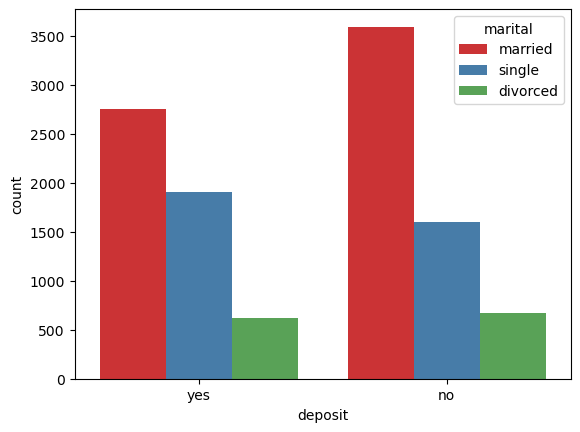

In [50]:
#Based on the marital status we will see the deposit's countplot


sns.countplot(x = 'deposit', hue = 'marital', data = df, palette = 'Set1')

<Axes: xlabel='deposit', ylabel='age'>

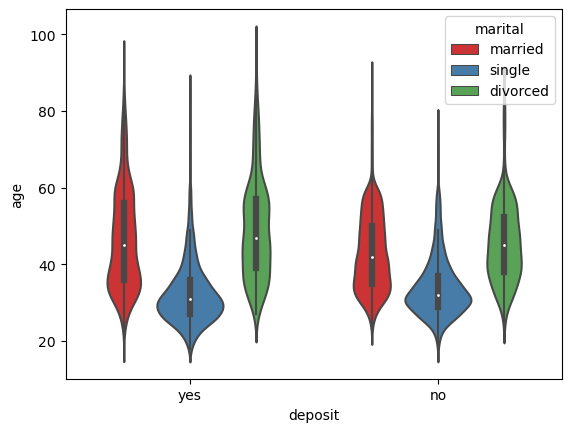

In [52]:
#Violin plot: split by marital and age

sns.violinplot(x = 'deposit', y = 'age', hue = 'marital', data = df, palette = 'Set1')

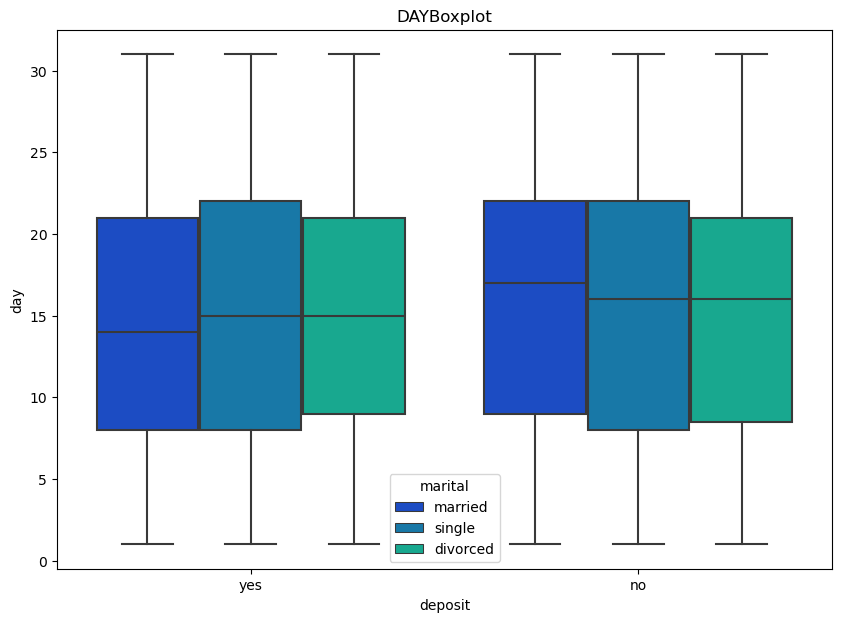

In [54]:
plt.figure(figsize =(10,7))
sns.boxplot(x = 'deposit', y = 'day', hue = 'marital', data = df, palette = 'winter')
plt.title('DAYBoxplot')
plt.show()

In [55]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,Not Available,5,may,1042,1,-1,0,Not Available,yes
1,56,admin.,married,secondary,no,45,no,no,Not Available,5,may,1467,1,-1,0,Not Available,yes
2,41,technician,married,secondary,no,1270,yes,no,Not Available,5,may,1389,1,-1,0,Not Available,yes
3,55,services,married,secondary,no,2476,yes,no,Not Available,5,may,579,1,-1,0,Not Available,yes
4,54,admin.,married,tertiary,no,184,no,no,Not Available,5,may,673,2,-1,0,Not Available,yes


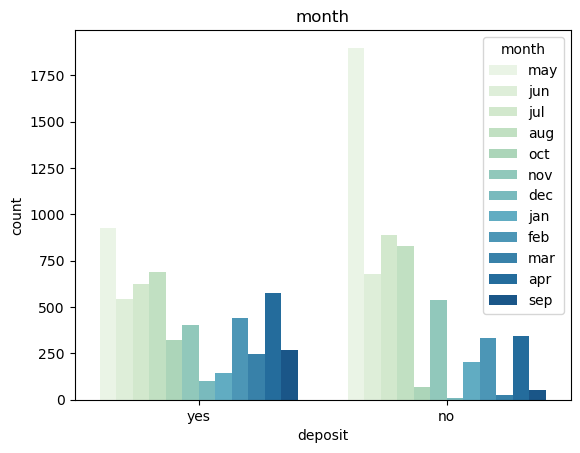

In [56]:
sns.countplot(x = 'deposit', hue = 'month', data = df, palette = 'GnBu')
plt.title('month')
plt.show()

In [57]:
# There is a difference in deposit baiss on month

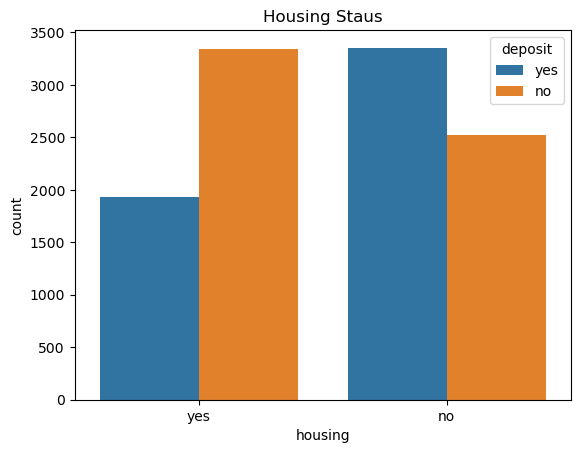

In [59]:
sns.countplot(x = 'housing', hue = 'deposit', data = df)
plt.title('Housing Staus')
plt.show()

In [60]:
#Housing yes, chance higher for deposit

In [61]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,Not Available,5,may,1042,1,-1,0,Not Available,yes
1,56,admin.,married,secondary,no,45,no,no,Not Available,5,may,1467,1,-1,0,Not Available,yes
2,41,technician,married,secondary,no,1270,yes,no,Not Available,5,may,1389,1,-1,0,Not Available,yes
3,55,services,married,secondary,no,2476,yes,no,Not Available,5,may,579,1,-1,0,Not Available,yes
4,54,admin.,married,tertiary,no,184,no,no,Not Available,5,may,673,2,-1,0,Not Available,yes


In [62]:
#count plot to check with poutcome and deposit

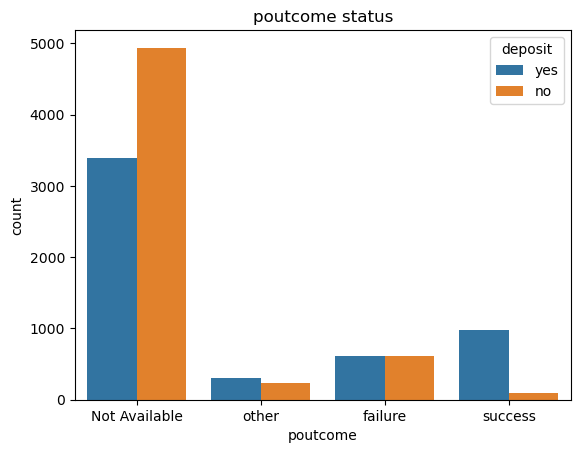

In [64]:
sns.countplot(x = 'poutcome', hue = 'deposit', data = df)
plt.title('poutcome status')
plt.show()

## Model Building

In [65]:
from sklearn.model_selection import train_test_split

In [67]:
df['default'].value_counts()

default
no     10994
yes      168
Name: count, dtype: int64

In [69]:
df['loan'].value_counts()

loan
no     9702
yes    1460
Name: count, dtype: int64

In [71]:
df['pdays'].value_counts()

pdays
-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: count, Length: 472, dtype: int64

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [74]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [75]:
X = df_encoded.drop('deposit_yes', axis=1)
y = df_encoded['deposit_yes']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [79]:
y_pred = log_model.predict(X_test)

In [80]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.815765900268737
Confusion Matrix:
 [[1464  278]
 [ 339 1268]]
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.84      0.83      1742
        True       0.82      0.79      0.80      1607

    accuracy                           0.82      3349
   macro avg       0.82      0.81      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [81]:
accuracy_score(y_test, y_pred)

0.815765900268737

In [83]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [85]:
y_pred = tree_model.predict(X_test)


In [86]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7751567632128994
Confusion Matrix:
 [[1381  361]
 [ 392 1215]]
Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.79      0.79      1742
        True       0.77      0.76      0.76      1607

    accuracy                           0.78      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.78      0.78      0.78      3349



In [87]:
accuracy_score(y_test, y_pred)

0.7751567632128994

In [89]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:06:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [90]:
y_pred = xgb_model.predict(X_test)


In [91]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.849507315616602
Confusion Matrix:
 [[1454  288]
 [ 216 1391]]
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.83      0.85      1742
        True       0.83      0.87      0.85      1607

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [92]:
accuracy_score(y_test, y_pred)

0.849507315616602

In [94]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [95]:
y_pred = rf_model.predict(X_test)


In [96]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8468199462526127
Confusion Matrix:
 [[1434  308]
 [ 205 1402]]
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.82      0.85      1742
        True       0.82      0.87      0.85      1607

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [97]:
accuracy_score(y_test, y_pred)

0.8468199462526127